In [ ]:
!pip install -q kaggle
!pip install -q sweetviz
!pip install -q numpy==1.23.5 scipy==1.9.3
!pip install -q autoviml

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from autoviml.Auto_ViML import Auto_ViML

In [3]:
# kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# dataset csv file
from google.colab import files
uploaded = files.upload()

Saving GlobalTemperatures.csv to GlobalTemperatures.csv


In [18]:
df = pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.03,3.57,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.08,3.70,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.63,3.08,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.49,2.45,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.57,2.07,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB
None


In [7]:
print(df.describe())

       LandAverageTemperature  LandAverageTemperatureUncertainty  \
count                3,180.00                           3,180.00   
mean                     8.37                               0.94   
std                      4.38                               1.10   
min                     -2.08                               0.03   
25%                      4.31                               0.19   
50%                      8.61                               0.39   
75%                     12.55                               1.42   
max                     19.02                               7.88   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count            1,992.00                       1,992.00            1,992.00   
mean                14.35                           0.48                2.74   
std                  4.31                           0.58                4.16   
min                  5.90                           0.04           

In [8]:
print(df.isnull().sum())

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [19]:
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index((df['dt']))
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,,
1750-01-01,1750-01-01,3.03,3.57,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,1750-02-01,3.08,3.70,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,1750-03-01,5.63,3.08,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,1750-04-01,8.49,2.45,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,1750-05-01,11.57,2.07,NaN,NaN,NaN,NaN,NaN,NaN


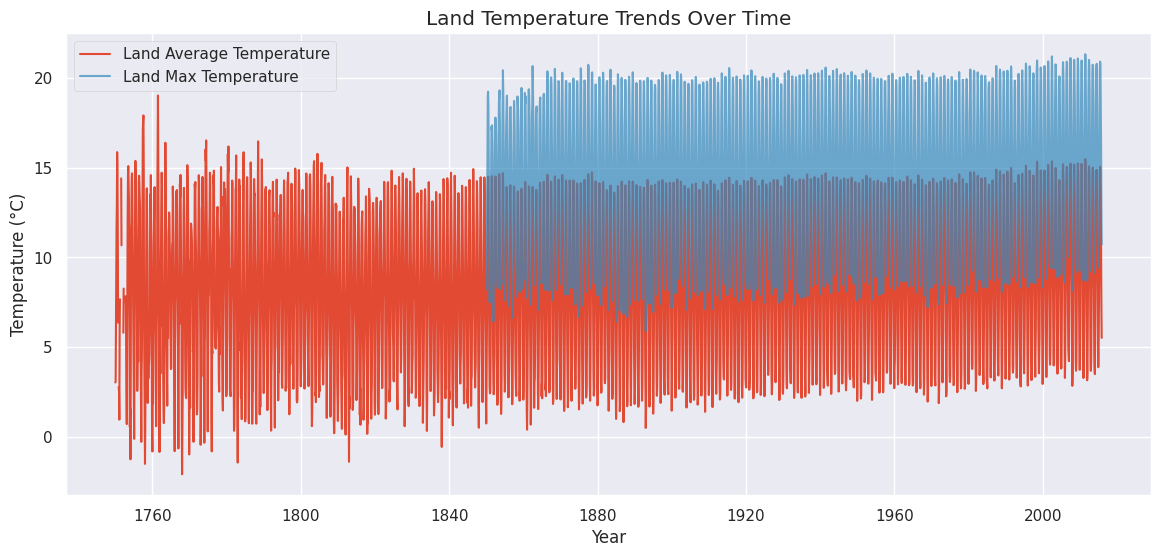

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Land Average Temperature')
plt.plot(df['dt'], df['LandMaxTemperature'], label='Land Max Temperature', alpha=0.7)
plt.legend()
plt.title('Land Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

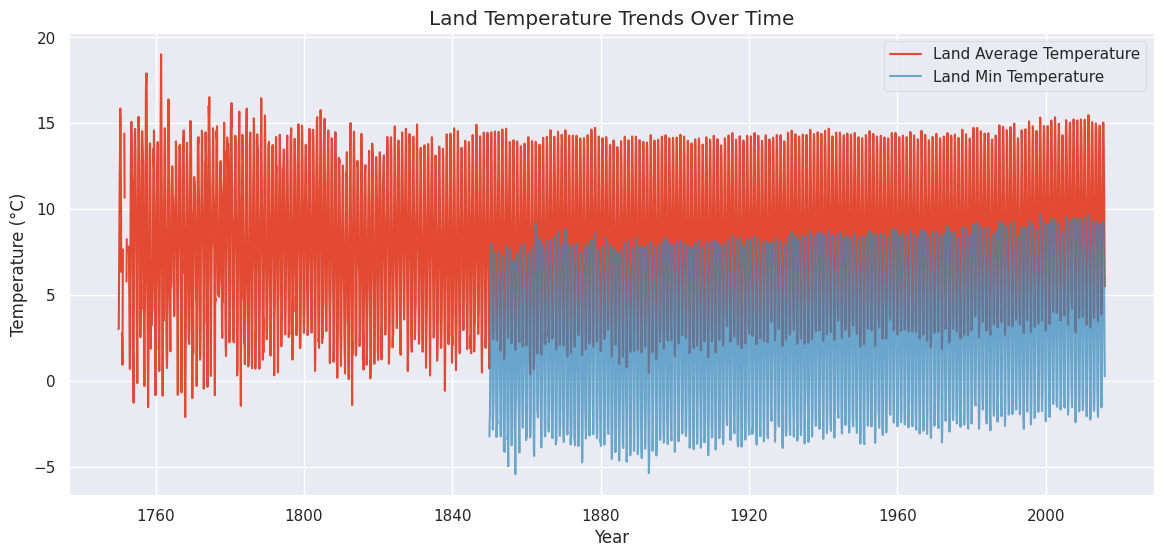

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Land Average Temperature')
plt.plot(df['dt'], df['LandMinTemperature'], label='Land Min Temperature', alpha=0.7)
plt.legend()
plt.title('Land Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

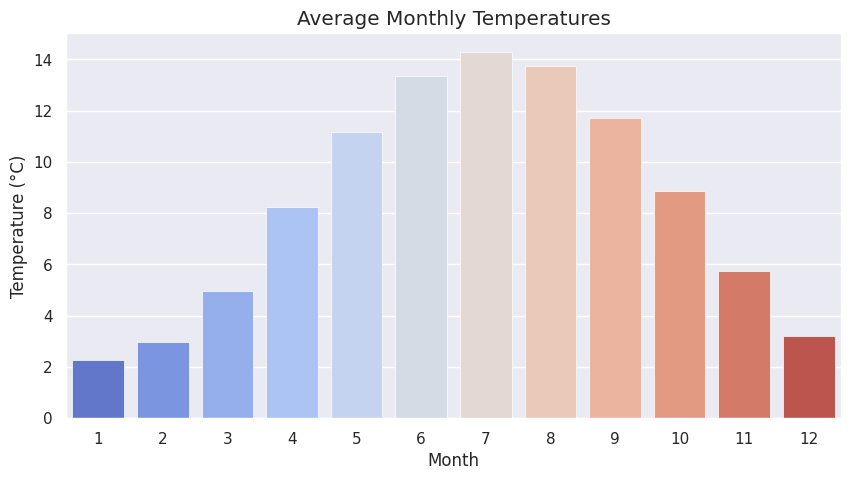

In [23]:
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

monthly_avg = df.groupby('Month')['LandAverageTemperature'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

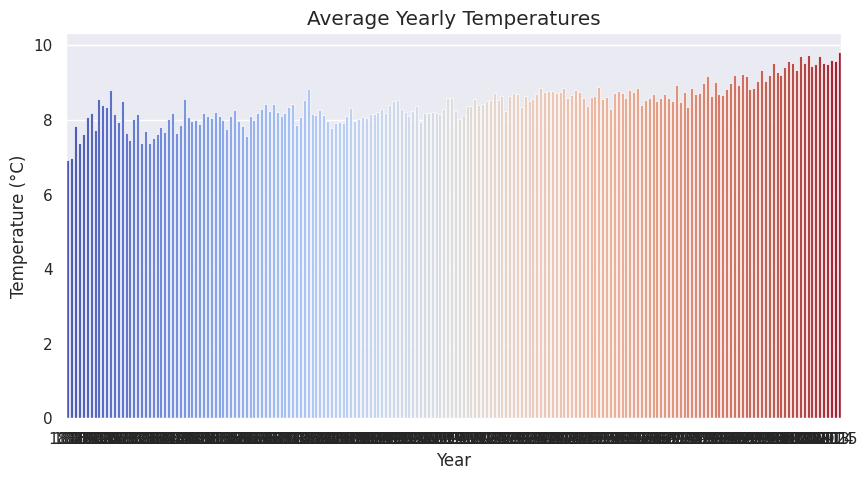

In [25]:
yearly_avg = df.groupby('Year')['LandAverageTemperature'].mean()
yearly_avg = yearly_avg[-200:]

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='coolwarm')
plt.title('Average Yearly Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

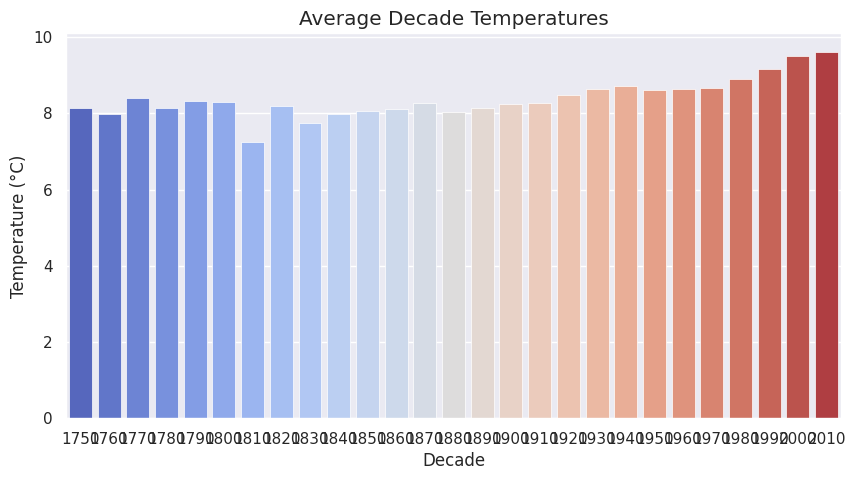

In [26]:
df['Decade'] = (df['Year'] // 10) * 10
decade_avg = df.groupby('Decade')['LandAverageTemperature'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_avg.index, y=decade_avg.values, palette='coolwarm')
plt.title('Average Decade Temperatures')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.show()

In [71]:
report = sv.analyze(df)
report.show_html('EDA_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].interpolate(method='time')
df['LandAverageTemperatureUncertainty'] = df['LandAverageTemperatureUncertainty'].interpolate(method='time')

print(df.isnull().sum())

dt                                              0
LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
Year                                            0
Month                                           0
Decade                                          0
dtype: int64


In [28]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,Decade
dt,,,,,,,,,,,,
1750-01-01,1750-01-01,3.03,3.57,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,1750
1750-02-01,1750-02-01,3.08,3.70,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,1750
1750-03-01,1750-03-01,5.63,3.08,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,1750
1750-04-01,1750-04-01,8.49,2.45,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,1750
1750-05-01,1750-05-01,11.57,2.07,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,1750


In [32]:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    df[col] = df[col].interpolate(method='time').fillna(method='bfill')

print(df.isnull().sum())

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
Year                                         0
Month                                        0
Decade                                       0
dtype: int64


In [33]:
df['Temp_Lag_1'] = df['LandAverageTemperature'].shift(1)
df['Temp_Lag_2'] = df['LandAverageTemperature'].shift(2)

df.dropna(inplace=True)

In [34]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,Decade,Temp_Lag_1,Temp_Lag_2
dt,,,,,,,,,,,,,,
1750-03-01,1750-03-01,5.63,3.08,8.24,1.74,-3.21,2.82,12.83,0.37,1750,3,1750,3.08,3.03
1750-04-01,1750-04-01,8.49,2.45,8.24,1.74,-3.21,2.82,12.83,0.37,1750,4,1750,5.63,3.08
1750-05-01,1750-05-01,11.57,2.07,8.24,1.74,-3.21,2.82,12.83,0.37,1750,5,1750,8.49,5.63
1750-06-01,1750-06-01,12.94,1.72,8.24,1.74,-3.21,2.82,12.83,0.37,1750,6,1750,11.57,8.49
1750-07-01,1750-07-01,15.87,1.91,8.24,1.74,-3.21,2.82,12.83,0.37,1750,7,1750,12.94,11.57


In [35]:
numeric_cols = df.select_dtypes(include=['number']).columns

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_cols])

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a9be68891b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


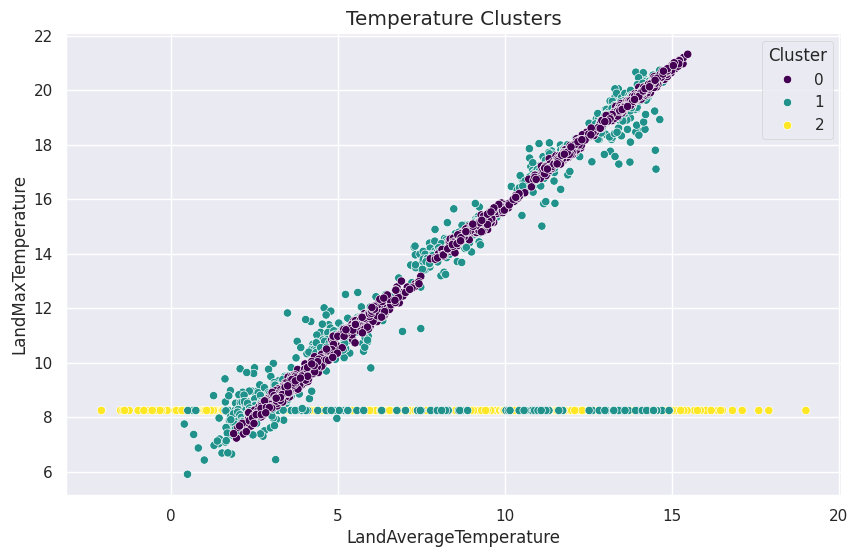

In [36]:
sns.scatterplot(x='LandAverageTemperature', y='LandMaxTemperature', hue='Cluster', data=df, palette='viridis')
plt.title('Temperature Clusters')
plt.show()

In [52]:
df = pd.read_csv('GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index((df['dt']))
df['LandAverageTemperature'] = df['LandAverageTemperature'].interpolate(method='time')
df['LandAverageTemperatureUncertainty'] = df['LandAverageTemperatureUncertainty'].interpolate(method='time')
df['Temp_Lag_1'] = df['LandAverageTemperature'].shift(1)
df['Temp_Lag_2'] = df['LandAverageTemperature'].shift(2)
df.dropna(inplace=True)
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Temp_Lag_1,Temp_Lag_2
dt,,,,,,,,,,,
1850-01-01,1850-01-01,0.75,1.10,8.24,1.74,-3.21,2.82,12.83,0.37,1.92,5.78
1850-02-01,1850-02-01,3.07,1.27,9.97,3.01,-2.29,1.62,13.59,0.41,0.75,1.92
1850-03-01,1850-03-01,4.95,0.95,10.35,2.40,-1.91,1.41,14.04,0.34,3.07,0.75
1850-04-01,1850-04-01,7.22,0.67,12.93,1.00,1.02,1.33,14.67,0.27,4.95,3.07
1850-05-01,1850-05-01,10.00,0.62,15.65,2.41,3.81,1.35,15.51,0.25,7.22,4.95


In [53]:
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month
df['Decade'] = (df['Year'] // 10) * 10

In [54]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_cols])

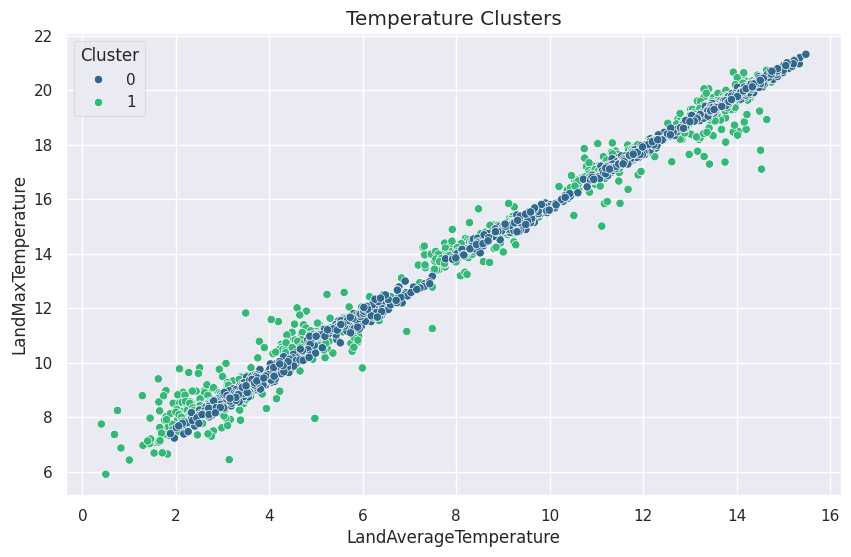

In [55]:
sns.scatterplot(x='LandAverageTemperature', y='LandMaxTemperature', hue='Cluster', data=df, palette='viridis')
plt.title('Temperature Clusters')
plt.show()

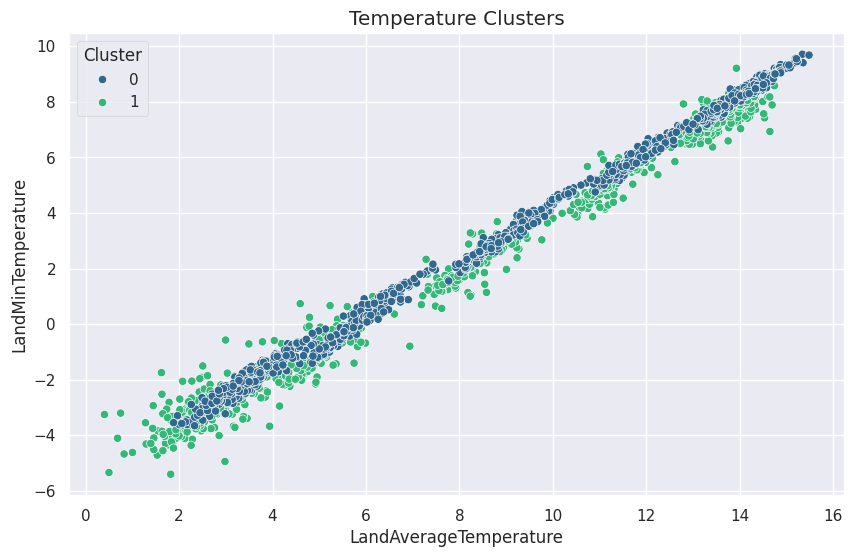

In [56]:
sns.scatterplot(x='LandAverageTemperature', y='LandMinTemperature', hue='Cluster', data=df, palette='viridis')
plt.title('Temperature Clusters')
plt.show()

In [65]:
X = df[['dt']]
y = df['LandAverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
train_data = X_train.copy()
train_data['LandAverageTemperature'] = y_train

In [67]:
train_data['dt_numeric'] = pd.to_datetime(train_data['dt']).astype(int) / 10**9
X_test['dt_numeric'] = pd.to_datetime(X_test['dt']).astype(int) / 10**9

In [68]:
train_data = train_data.drop('dt', axis=1)
X_test = X_test.drop('dt', axis=1)

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1593, 2)
    Training Set Memory Usage = 0.04 MB
Test Set Shape = (399, 1)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['LandAverageTemperature']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of N

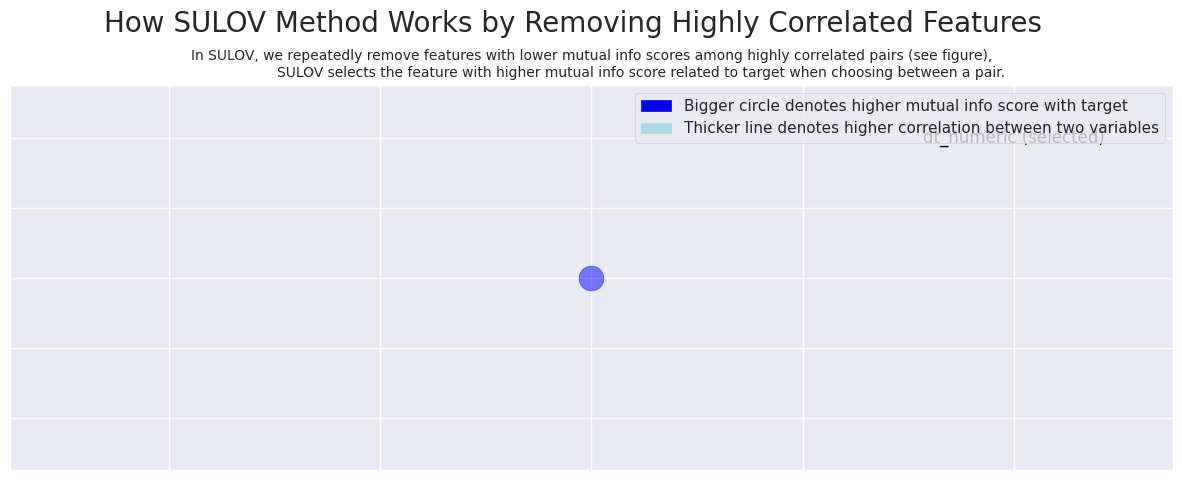

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 1 
    Finding Important Features using Boosted Trees algorithm...
Found 0 important features
No important features found. Using all input features...
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  1274 , CV rows =  319
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
##################################################################

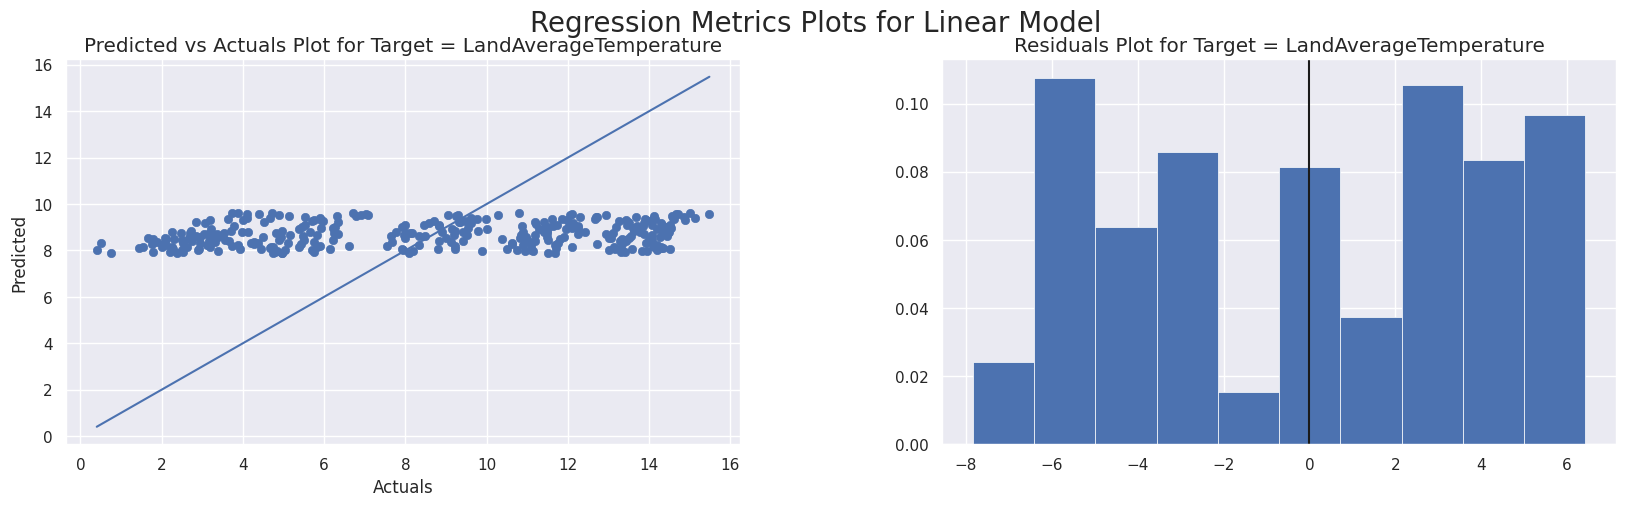

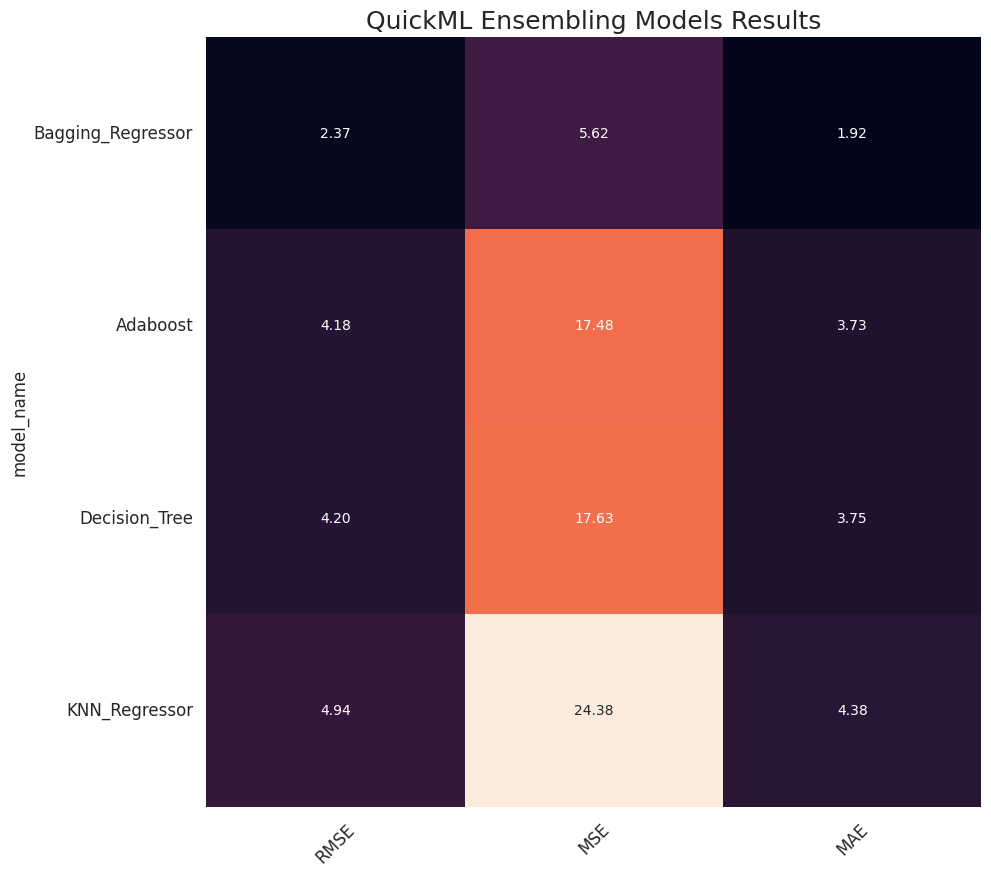

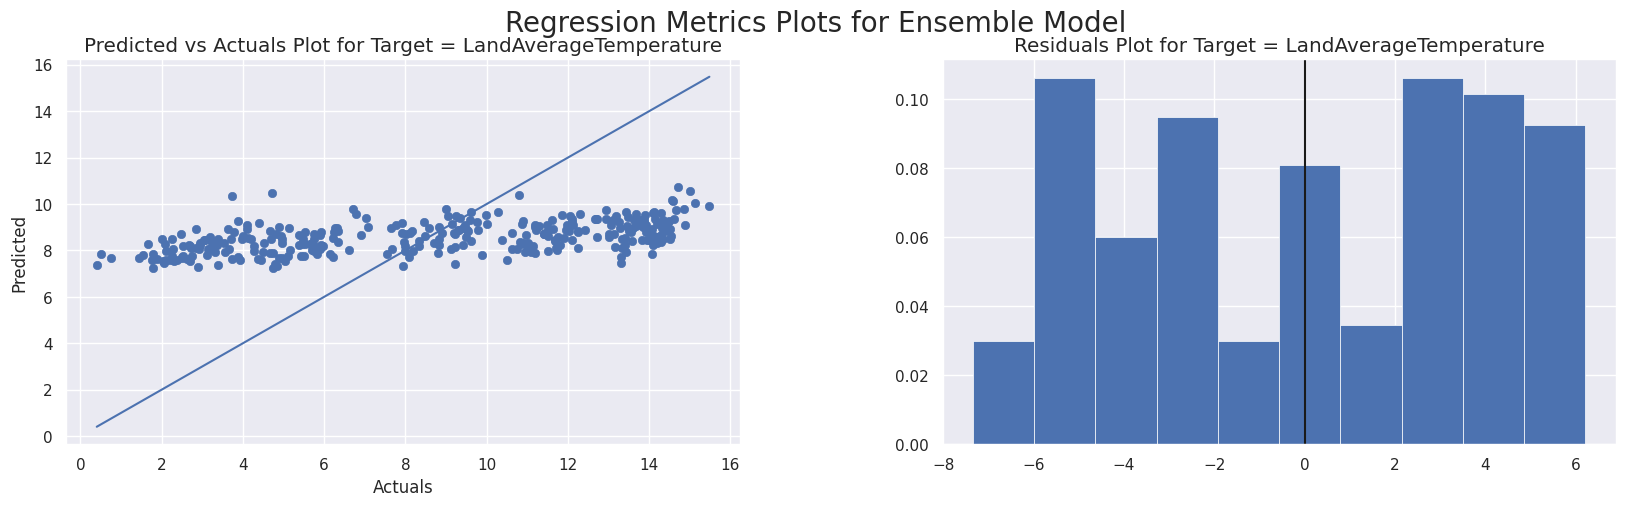

<Figure size 1500x500 with 0 Axes>

In [69]:
try:
    result = Auto_ViML(
        train=train_data,
        test=X_test,
        target='LandAverageTemperature',
        verbose=1
    )
    print(f"Auto_ViML result: {result}")  # Print the result to see what it returns
    model, features, trainm, testm = result
except Exception as e:
    print(f"An error occurred: {e}")

In [70]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.6618051588839148e+19
R2 Score: -9.05804405767512e+17
